# Wrangle

We will start with mall_customers database

- aquire: verify our acquire module is working
- summarize our data
- plot histograms + boxplots
- nulls
- outliers
- astype()
- pd.cut()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from acquire import get_mall_data

In [6]:
mall.shape

(200, 5)

In [5]:
mall = get_mall_data()
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

**Takeaways**
1. encode gender
2. drop customer_id
3. define our target variable: spending_score

In [9]:
mall.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [11]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**Takeaways**
1. Not sure how annual income is computed, or what units it is in.
2. I don't know what spending score means, I assuming higher spending score means more likely to spend, better to market to?

### Plot Distributions
Histograms

In [12]:
mall.columns

Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

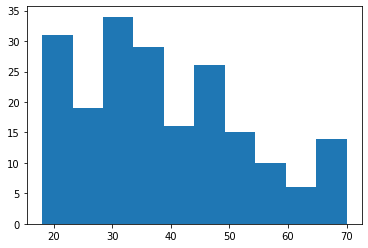

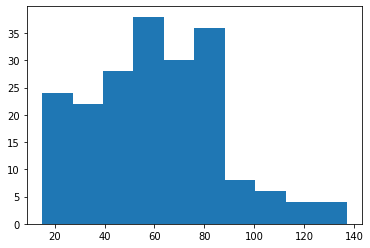

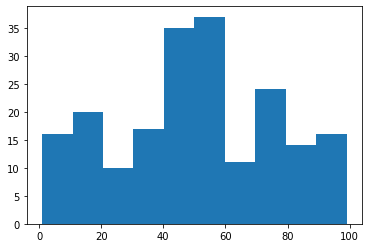

In [14]:
for col in ['age', 'annual_income', 'spending_score']:
    plt.hist(mall[col])
    plt.show()

Boxplots

In [ ]:
nulls, outliers, cut, dropna, fillna, get_dummies (think about if any new features to compute) train, validate